In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (10, 7)
import math

### 자유도 

10, 14, 12, 18, 16 이라는 데이터가 있을 때

이 데이터의 합계는 70이고 평균은 14이다. 

평균이 14임을 알고 있으면 위의 데이터중 하나를 모르더라도 그 숫자를 찾아낼 수 있다.

그러므로 표본평균 값을 알고 있으면 전체 데이터 n개 중 자유롭게 값을 취할 수 있는 데이터는 n-1개이다.

In [2]:
df = pd.read_csv('data3/ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [3]:
len(df)

400

In [4]:
scores = df['score'].values
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [5]:
# 모집단 평균
scores.mean()

69.53

In [6]:
# 임의의 표본 추출
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [7]:
# 편향 표본분산
print(sample.var())
# 비편향 표본분산(자유도 적용)
print(sample.var(ddof=1))

150.34000000000003
158.25263157894742


In [8]:
# 편향 표본편차
print(sample.std())
# 비편향 표본편차
print(sample.std(ddof=1))

12.261321299109653
12.579850220847124


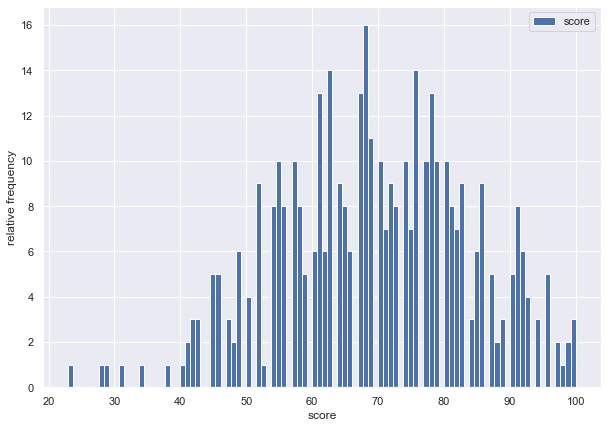

In [24]:
df.plot.hist(bins=100)
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

### 표본의 크기가 충분히 크면 모집단에 가까워진다.

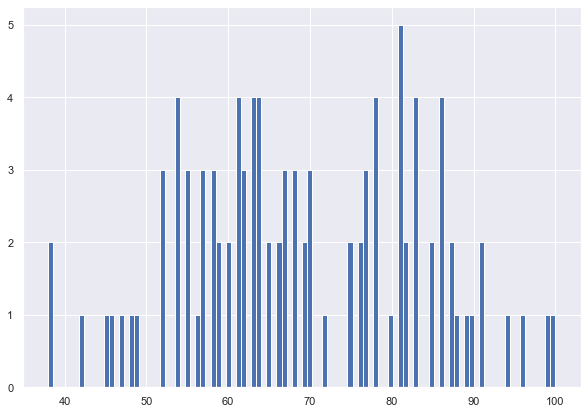

In [36]:
# 100개의 표본 추출
sample = np.random.choice(scores, 100)
plt.hist(sample, bins=100)
plt.show()

### 표본의 수가 충분히 많으면 모집단에 가까워진다.

In [38]:
n = 20
nSample = 100
sample_mean = np.array([np.random.choice(scores, n).mean() for _ in range(nSample)])
sample_mean

array([72.95, 71.15, 66.  , 72.75, 71.5 , 70.25, 65.65, 68.2 , 67.75,
       69.25, 71.7 , 72.  , 68.95, 69.4 , 74.75, 71.9 , 68.5 , 70.15,
       63.45, 67.95, 67.  , 67.2 , 74.  , 67.3 , 73.75, 72.95, 67.75,
       63.95, 71.15, 66.5 , 72.75, 74.7 , 73.2 , 69.45, 73.4 , 72.85,
       70.85, 69.1 , 66.6 , 75.15, 70.15, 68.95, 68.65, 76.05, 69.45,
       72.5 , 69.95, 72.95, 64.5 , 64.85, 76.4 , 63.75, 70.3 , 72.  ,
       70.  , 65.35, 67.9 , 68.9 , 68.15, 61.2 , 68.05, 71.45, 65.45,
       69.7 , 63.1 , 75.1 , 68.7 , 72.45, 71.45, 65.9 , 72.05, 67.95,
       62.85, 73.8 , 69.25, 64.95, 75.  , 70.2 , 72.15, 73.8 , 64.45,
       69.15, 75.4 , 66.1 , 70.35, 66.15, 66.5 , 60.65, 63.5 , 70.55,
       71.6 , 70.5 , 65.5 , 68.45, 70.5 , 75.95, 70.75, 71.8 , 76.  ,
       71.8 ])

### 중심 극한 정리
- 모집단에서 취한 표본 평균값의 분포는 표본 수가 커질수록 평균값을 중심으로 하는 정규 분포에 가까워진다

In [47]:
print('모평균: ', scores.mean())
print('표본평균의 평균: ', sample_mean.mean() )
print('모분산 / 표본 갯수: ', scores.var() / n)
print('표본평균의 분산: ', sample_mean.var())
# 평균의 표준 오차(SEM: Standard Error of the Mean): 표본 평균 분포의 표준 편차를 가리킨다. 
print('평균의 표준 오차(SEM: Standard Error of the Mean): ', scores.std() / math.sqrt(n))
print(sample_mean.std())

# 표본 평균에 대한 표준 편차는 표본 평균의 오차에 대한 표준 편차와 동일하다. 이러한 맥락은 중심극한정리(CLT)를 의미한다.

모평균:  69.53
표본평균의 평균:  69.6475
모분산 / 표본 갯수:  10.333454999999999
표본평균의 분산:  12.648668750000002
평균의 표준 오차(SEM: Standard Error of the Mean):  3.2145691779770424
3.5564966961885403


### 모평균 추정
- 신뢰구간 1.96(95% 신뢰도), 2.58(99% 신뢰도)

n명을 임으로 표본 추출<br>
모(진짜)평균(μ:평균), 모(진짜)편차:$ \sigma $  <br>
표본평균:$ \bar{X} $  <br>
$ \bar{X} -k * \dfrac{ \sigma }{ \sqrt{n} } \le m \le \bar{X} +k * \dfrac{ \sigma }{ \sqrt{n} }   $ <br>
k:신뢰도 상수

표본갯수가 30개 이상이면 모표준편차와 표준편차를 동일한 것으로 본다 <br>
$ s = \sigma $

평균의 표준 오차(standard error of the mean, SEM) = 
$ \dfrac{ \sigma }{ \sqrt{n} } $



In [49]:
# 표본 수
n = 30
# 표본 추출
sample = np.random.choice(scores, n)
# 표본평균
sMean = sample.mean()
# 표본 편차
sStd = sample.std()

print('모평균: ', scores.mean())
print('표본평균: ', sMean)
print('모편차: ', scores.std())
print('표본편차: ', sStd)

모평균:  69.53
표본평균:  70.06666666666666
모편차:  14.375990400664575
표본편차:  18.06273019845622


In [55]:
# 95% 신뢰구간 계산
# 보통 모편차를 모르기 때문에 표준편차를 사용한다
a = sMean - 1.96 * (sample.std() / math.sqrt(n))
b = sMean + 1.96 * (sample.std() / math.sqrt(n))
print(f'{a} <= m <= {b}')

63.603001677181496 <= m <= 76.53033165615183


In [56]:
# scipy 라이브러리 사용
import scipy.stats as st
st.norm.interval(0.95, sample.mean(), scale=st.sem(sample, ddof=0))

(63.603120448542484, 76.53021288479084)

### 연습 문제 1)
- 어느 호수의 납의 농도는 표준편차가 3mg/L 이다.
- 이 호수에서 납의 농도를 16번 측정한 결과 평균 농도는 18mg/L 이었다.
- 이 호수에서 납의 농도에 대한 모평균 m의 신뢰도 95%의 신뢰구간을 구하라

In [57]:
# 모 표준편차
sigma = 3
# 표본의 수 
n = 16
# 표본평균
x_bar = 18

a = x_bar - 1.96 * (sigma / math.sqrt(n))
b = x_bar + 1.96 * (sigma / math.sqrt(n))
print(f'{a} <= m <= {b}')

16.53 <= m <= 19.47


In [58]:
st.norm.interval(0.95, x_bar, sigma / math.sqrt(n))

(16.53002701159496, 19.46997298840504)

### 연습 문제 2)
- 어느 고등학교 남학생 36명의 제자리멀리뛰기 기록은 평균이 216cm 표준편차가 10cm이다.
- 이 학교 남학생들의 제자리멀리뛰기 기록에 대한 모평균 m의 99% 신뢰구간을 구하라

In [59]:
# 표본 수
n = 36
# 표본평균
x_bar = 216
# 표본 표준편차 
s = 10

a = x_bar - 2.58 * (s / math.sqrt(n))
b = x_bar + 2.58 * (s / math.sqrt(n))
print(f'{a} <= m <= {b}')

211.7 <= m <= 220.3


In [60]:
st.norm.interval(0.99, x_bar, s / math.sqrt(n))

(211.70695116075183, 220.29304883924817)